In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv(r"C:\Users\TEJKIRAN\Desktop\DataAnalytics_files\titanic.csv")
df.head(10)

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,"Moran, Mr. James",3,male,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,"McCarthy, Mr. Timothy J",1,male,54.0,0,0,17463,51.8625,E46,S,0
7,8,"Palsson, Master. Gosta Leonard",3,male,2.0,3,1,349909,21.0750,NaN,S,0
8,9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",3,female,27.0,0,2,347742,11.1333,NaN,S,1
9,10,"Nasser, Mrs. Nicholas (Adele Achem)",2,female,14.0,1,0,237736,30.0708,NaN,C,1


In [3]:
X=df.drop(["PassengerId","Name","SibSp","Parch","Ticket","Cabin","Survived"],axis=1)
X

,Pclass,Sex,Age,Fare,Embarked
0,3,male,22.0,7.2500,S
1,1,female,38.0,71.2833,C
2,3,female,26.0,7.9250,S
3,1,female,35.0,53.1000,S
4,3,male,35.0,8.0500,S
...,...,...,...,...,...
886,2,male,27.0,13.0000,S
887,1,female,19.0,30.0000,S
888,3,female,NaN,23.4500,S
889,1,male,26.0,30.0000,C


In [4]:
y=pd.DataFrame(df["Survived"])
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [5]:
sex=pd.get_dummies(df.Sex,drop_first=True)
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [6]:
X["sex"]=sex

In [7]:
X

,Pclass,Sex,Age,Fare,Embarked,sex
0,3,male,22.0,7.2500,S,1
1,1,female,38.0,71.2833,C,0
2,3,female,26.0,7.9250,S,0
3,1,female,35.0,53.1000,S,0
4,3,male,35.0,8.0500,S,1
...,...,...,...,...,...,...
886,2,male,27.0,13.0000,S,1
887,1,female,19.0,30.0000,S,0
888,3,female,NaN,23.4500,S,0
889,1,male,26.0,30.0000,C,1


In [8]:
X=X.drop("Sex",axis=1)
X

,Pclass,Age,Fare,Embarked,sex
0,3,22.0,7.2500,S,1
1,1,38.0,71.2833,C,0
2,3,26.0,7.9250,S,0
3,1,35.0,53.1000,S,0
4,3,35.0,8.0500,S,1
...,...,...,...,...,...
886,2,27.0,13.0000,S,1
887,1,19.0,30.0000,S,0
888,3,NaN,23.4500,S,0
889,1,26.0,30.0000,C,1


In [9]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:
embarked=pd.get_dummies(df.Embarked,drop_first=True)
embarked

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [11]:
X=X.join(embarked)
X

,Pclass,Age,Fare,Embarked,sex,Q,S
0,3,22.0,7.2500,S,1,0,1
1,1,38.0,71.2833,C,0,0,0
2,3,26.0,7.9250,S,0,0,1
3,1,35.0,53.1000,S,0,0,1
4,3,35.0,8.0500,S,1,0,1
...,...,...,...,...,...,...,...
886,2,27.0,13.0000,S,1,0,1
887,1,19.0,30.0000,S,0,0,1
888,3,NaN,23.4500,S,0,0,1
889,1,26.0,30.0000,C,1,0,0


In [12]:
X=X.drop("Embarked",axis=1)
X

,Pclass,Age,Fare,sex,Q,S
0,3,22.0,7.2500,1,0,1
1,1,38.0,71.2833,0,0,0
2,3,26.0,7.9250,0,0,1
3,1,35.0,53.1000,0,0,1
4,3,35.0,8.0500,1,0,1
...,...,...,...,...,...,...
886,2,27.0,13.0000,1,0,1
887,1,19.0,30.0000,0,0,1
888,3,NaN,23.4500,0,0,1
889,1,26.0,30.0000,1,0,0


In [13]:
X.isna().any()

Pclass    False
Age        True
Fare      False
sex       False
Q         False
S         False
dtype: bool

In [14]:
X=X.dropna(axis=1)
X

,Pclass,Fare,sex,Q,S
0,3,7.2500,1,0,1
1,1,71.2833,0,0,0
2,3,7.9250,0,0,1
3,1,53.1000,0,0,1
4,3,8.0500,1,0,1
...,...,...,...,...,...
886,2,13.0000,1,0,1
887,1,30.0000,0,0,1
888,3,23.4500,0,0,1
889,1,30.0000,1,0,0


In [15]:
X.isna().any()

Pclass    False
Fare      False
sex       False
Q         False
S         False
dtype: bool

In [16]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [18]:
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=42,test_size=0.3)

In [19]:
model=LogisticRegression()
model.fit(X_train,y_train)

C:\Users\TEJKIRAN\anaconda3\envs\TejEnv\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [20]:
X_test[:10]

,Pclass,Fare,sex,Q,S
709,3,15.2458,1,0,0
439,2,10.5000,1,0,1
840,3,7.9250,1,0,1
720,2,33.0000,0,0,1
39,3,11.2417,0,0,0
290,1,78.8500,0,0,1
300,3,7.7500,0,1,0
333,3,18.0000,1,0,1
208,3,7.7500,0,1,0
136,1,26.2833,0,0,1


In [21]:
y_test[:10]

,Survived
709,1
439,0
840,0
720,1
39,1
290,1
300,1
333,0
208,1
136,1


In [22]:
y_pred=model.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0], dtype=int64)

In [23]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[122,  35],
       [ 28,  83]], dtype=int64)

In [24]:
score=accuracy_score(y_test,y_pred)
score

0.7649253731343284

In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79       157
           1       0.70      0.75      0.72       111

    accuracy                           0.76       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.77      0.76      0.77       268



Text(69.0, 0.5, 'Truth')

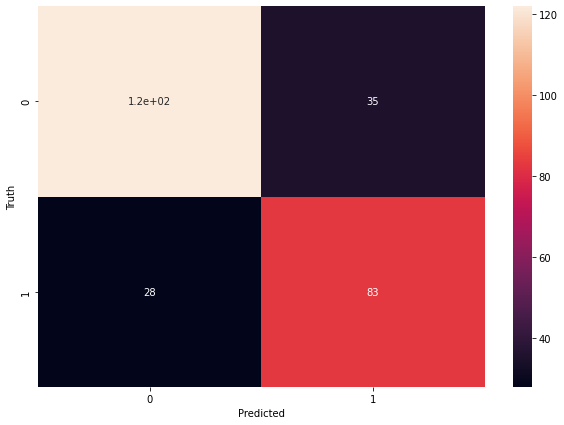

In [26]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel('Truth')